### Libraries import

In [1]:
library('ggplot2')
library('latex2exp')
library("gridExtra")
library(purrr)
library('latex2exp')
library('lubridate')
library('reshape2')
library('tidyverse')


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ dplyr::combine()         masks gridExtra::combine()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()



### Exercise 1

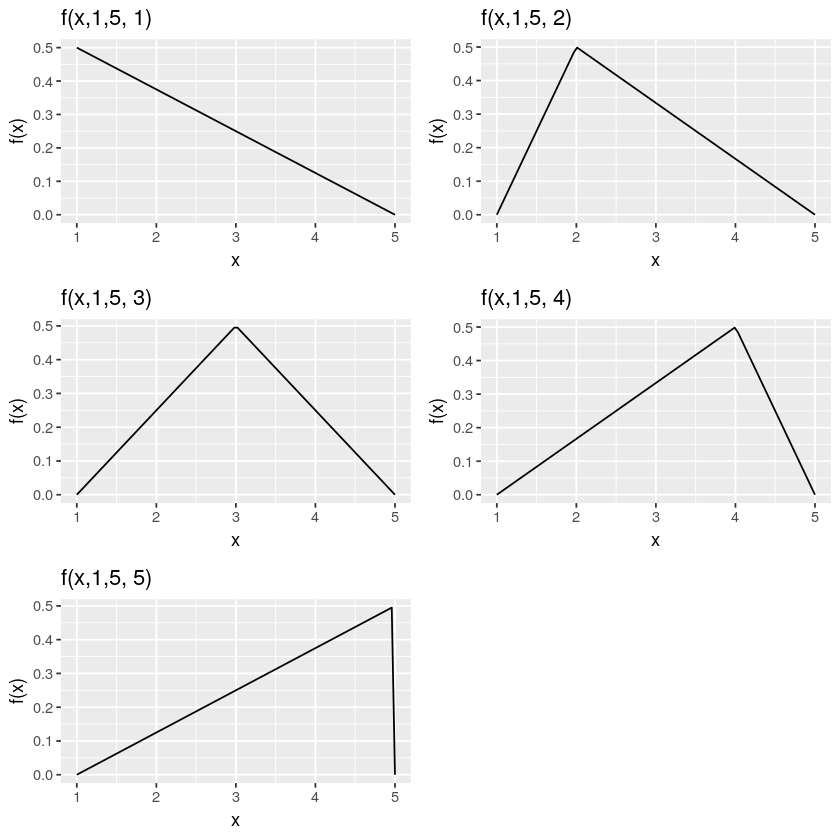

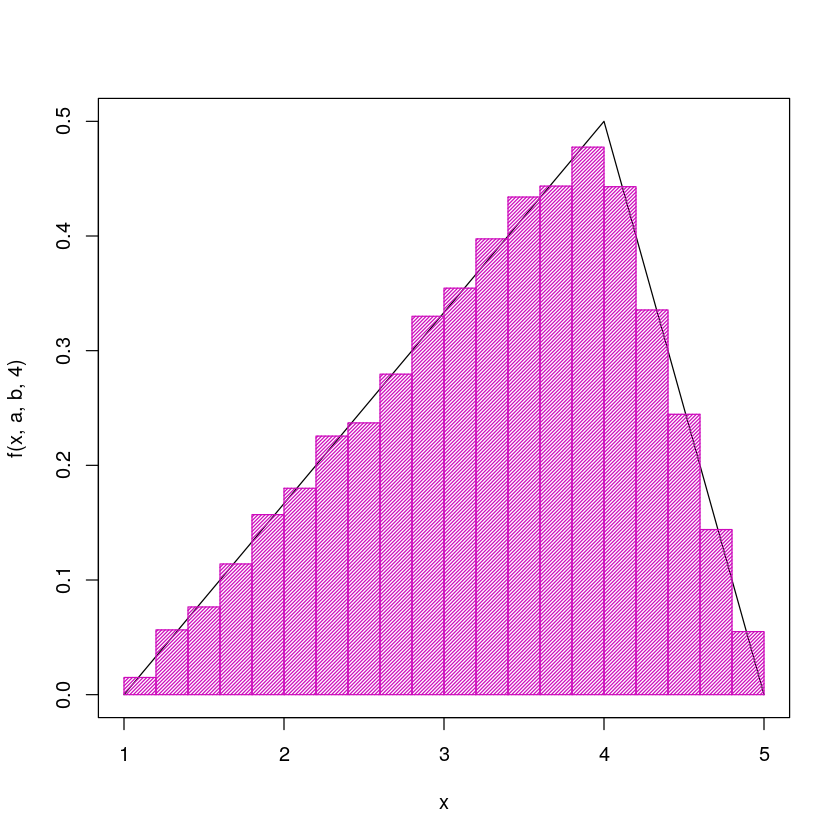

In [7]:
f <- function(x,a,b,c) {
    q <- ifelse (x >= a & x<c, 
                2*(x-a)/((b-a)*(c-a)),
                ifelse ( x >= c & x<b,
                        2*(b-x)/((b-a)*(b-c)),
                        0
                )
                )
}

I = c(1,5)
a <- I[[1]]
b <- I[[2]]
c <- 4

x <- seq(a,b, length.out=100)


plot <- lapply(1:5, function(c) ggplot() + geom_line(aes(x = x, y = f(x,a,b,c))) + 
    labs(title=sprintf("f(x,1,5, %.f)", c),  x='x', y='f(x)'))
require(gridExtra)
do.call(grid.arrange,  plot)

rf <-function (n,a,b,c) {
    u <- runif(n)
    cdf <- function(x) {integrate(f, a, x, a=a, b=b, c=c)$value}
    F.inv <- Vectorize(function(y){uniroot(function(x){cdf(x)-y}, lower=a, upper=b, extendInt='yes', tol=0.0001)$root})
    return(F.inv(u))
}



curve(f(x,a,b,4),1,5)
hist(rf(10000, 1,5,4), prob=TRUE, add=TRUE, density=50, col=6, breaks=20)

### Exercise 2

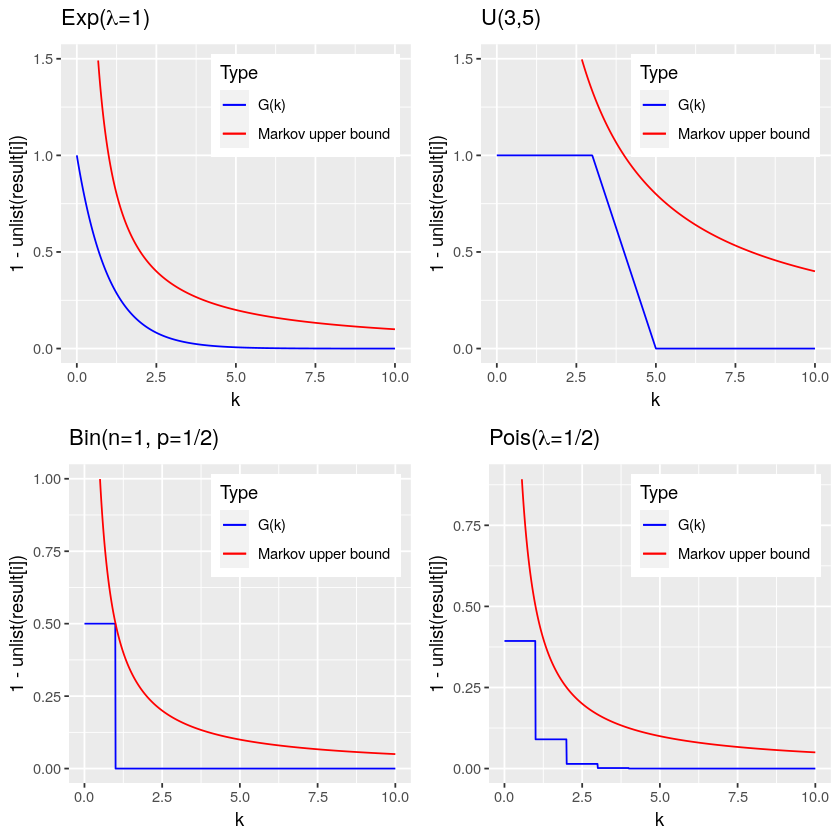

In [3]:
funct <- c(pexp, punif, pbinom, ppois)
param <- list(list(rate=1), 
           list(min=3, max=5), 
           list(size=1, prob=1/2),
           list(lambda=1/2)
          )
mean<-c(1,4,1/2,1/2)
title<-c(TeX('Exp($\\lambda$=1)'), 'U(3,5)', 
         'Bin(n=1, p=1/2)', TeX('Pois($\\lambda$=1/2)'))

x <- seq(0, 10, len=1000)
result <- invoke_map(funct, param, x)

    
  
plots = lapply(1:4, function(i) ggplot() + geom_line(aes(x = x, y = 1-unlist(result[i]), color='G(k)')) + 
    labs(colour="Type", title=title[i],  x='k') + 
    geom_line(aes(x = x, y = mean[i]/x, color='Markov upper bound'))  + 
   scale_colour_manual(values=c("blue", "red")) +
    ylim(0, max(1-unlist(result[i]))+0.5) +
    theme(
    legend.position = c(0.97, 0.97),
    legend.justification = c("right", "top")))

require(gridExtra)
do.call(grid.arrange,  plots)

### Exercise 3

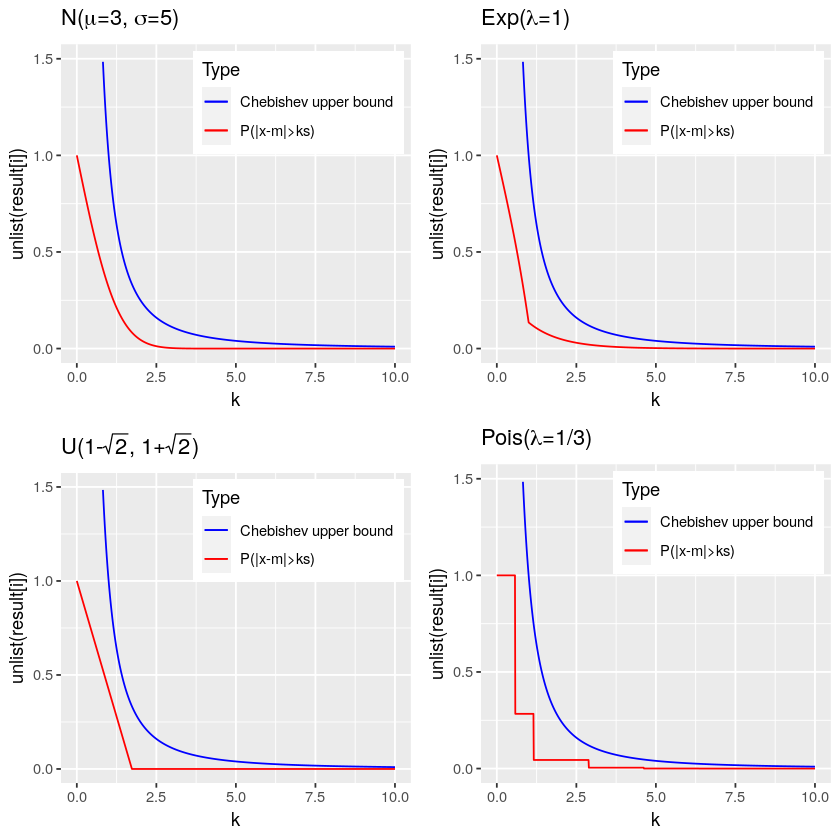

In [4]:
cheby <- function(x, f, mu, sigma, ...) {
    p <- 1-f(mu+x*sigma, ...)+f(mu-x*sigma, ...)
    return(p)
}

funct <- c(cheby)
x <- seq(0,10,len=1000)
param <- list(list(f=pnorm, mu=3, sigma=5, mean=3, sd=5),
              list(f=pexp, mu=1, sigma=1, rate=1),
              list(f=punif, mu=1, sigma=2*sqrt(2/12), min=1-sqrt(2), max=1+sqrt(2)),
              list(f=ppois, mu=1/3, sigma=sqrt(1/3), lambda=1/3)
              )
title<-c(TeX('N($\\mu$=3, $\\sigma$=5)'), 
         TeX('Exp($\\lambda$=1)'), 
         TeX('U(1-$\\sqrt{2}$, 1+$\\sqrt{2}$)'), 
         TeX('Pois($\\lambda$=1/3)'))
result <- invoke_map(cheby, param, x)

plots = lapply(1:4, function(i) ggplot() + geom_line(aes(x = x, y = unlist(result[i]), 
       color=('P(|x-m|>ks)'))) + 
    labs(colour="Type", title=title[i],  x='k') + 
    geom_line(aes(x = x, y = 1/x^2, color='Chebishev upper bound'))  + 
   scale_colour_manual(values=c("blue", "red")) +
    ylim(0, max(unlist(result[i]))+0.5) +
    theme(
    legend.position = c(0.98, 0.98),
    legend.justification = c("right", "top")))

require(gridExtra)
do.call(grid.arrange,  plots)

### Exercise 4: Italian vs Sweden model
I decided to compare the trends in two states that faced the COVID-19 emergency in two opposite ways: lockdown (Italy) vs not even mask duty (Sweden)

In [ ]:
mobility <- read_csv('../DATA/Global_Mobility_Report.csv')
italy <- read_csv('../DATA/Region_Mobility_Report_CSVs/2020_IT_Region_Mobility_Report.csv')
sweden <- read_csv('../DATA/Region_Mobility_Report_CSVs/2020_SE_Region_Mobility_Report.csv')

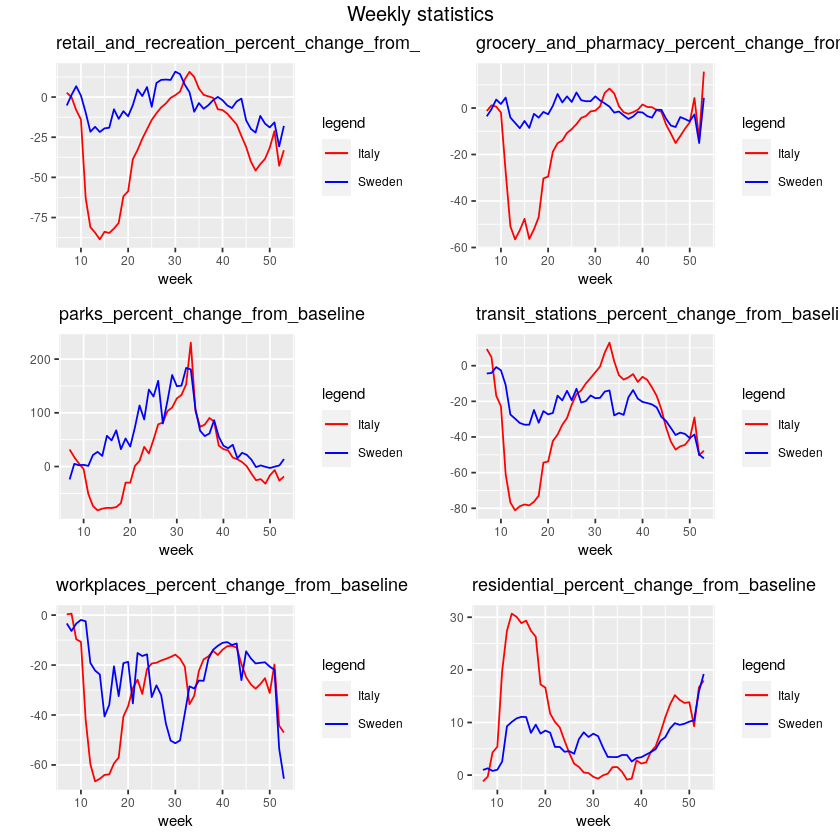

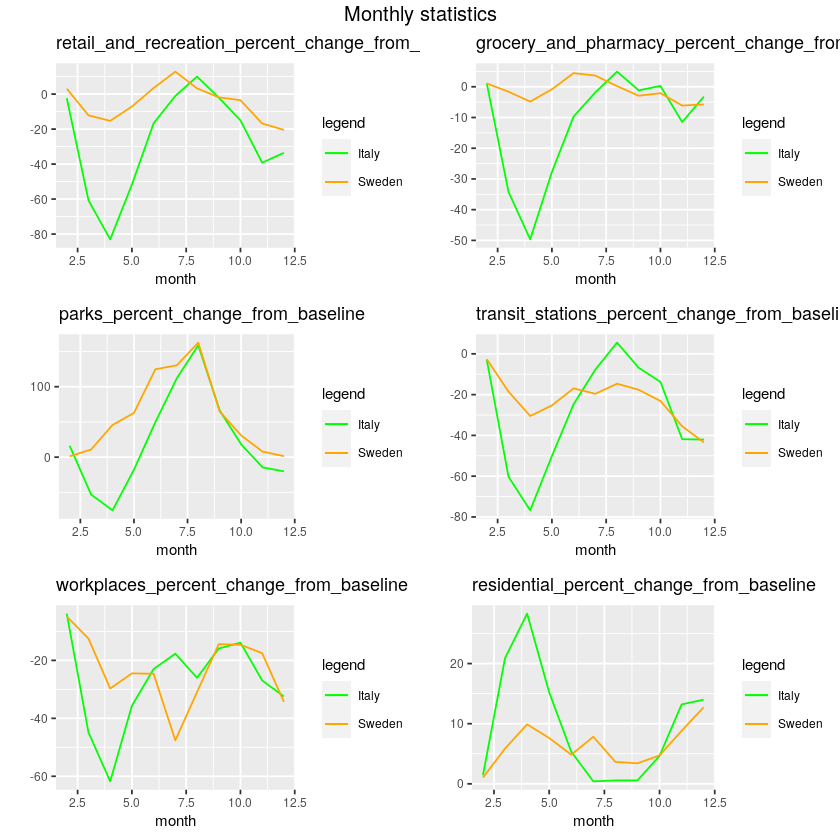

In [6]:
week_italy = aggregate(italy[, 10:15], list(isoweek(italy$date)), mean, na.rm=TRUE)
month_italy = aggregate(italy[, 10:15], list(month(italy$date)), mean, na.rm=TRUE)
week_sweden = aggregate(sweden[, 10:15], list(isoweek(sweden$date)), mean, na.rm=TRUE)
month_sweden = aggregate(sweden[, 10:15], list(month(sweden$date)), mean, na.rm=TRUE)
week <- week_italy[, 1]
month <- month_italy[, 1]

plots = lapply(2:7, function(i) ggplot() + geom_line(aes(x = week, y = week_italy[,i], 
       , color='Italy')) +  geom_line(aes(x = week, y = week_sweden[,i], color='Sweden'
       )) +
    labs(colour="legend", title=(colnames(week_italy)[i]),  x='week', y='') + 
    theme(text = element_text(size=9)) +
   scale_colour_manual(values=c("red", "blue")) 
   )


args <- c(plots, list(top = "Weekly statistics")) 
require(gridExtra)
do.call(grid.arrange,  args)


plots = lapply(2:7, function(i) ggplot() + geom_line(aes(x = month, y = month_italy[,i], 
       , color='Italy')) +  geom_line(aes(x = month, y = month_sweden[,i], color='Sweden'
       )) +
    labs(colour="legend", title=(colnames(month_italy)[i]),  x='month', y='') + 
    theme(text = element_text(size=9)) +
   scale_colour_manual(values=c("green", "orange")) 
   )

args <- c(plots, list(top = "Monthly statistics")) 
require(gridExtra)
do.call(grid.arrange,  args)